# Question 1 - LLM for data engineering

## Q1.1 Assume you need datasets to train a recommender system that predicts user preferences for products. Use ChatGPT (GPT-4) to find relevant datasets. List the prompts you used and the corresponding outputs from ChatGPT.

### Prompt:

I need to predicts user preferences for products. Give me a datasets to train a system.

### Corresponding outputs:

For predicting user preferences for products, there are several public datasets available that can be used to train recommendation systems. Here are some popular ones:

1. **MovieLens Dataset**:
   - A widely used dataset for building recommendation systems, especially collaborative filtering methods.
   - Contains user ratings for movies, which can be adapted to other products.
   - Available in different sizes: MovieLens 100K, 1M, 10M, and 20M datasets.
   - [Link to MovieLens dataset](https://grouplens.org/datasets/movielens/)

2. **Amazon Product Reviews Dataset**:
   - Contains millions of user reviews and ratings for products on Amazon.
   - Includes information on products, ratings, reviews, and metadata that can help with building content-based and collaborative filtering recommendations.
   - [Link to Amazon Product Reviews dataset](https://registry.opendata.aws/amazon-reviews/)

3. **Retailrocket Recommender System Dataset**:
   - Contains interactions, product views, and purchases made by users on a real e-commerce platform.
   - Useful for building recommendation systems for online retail.
   - [Link to Retailrocket dataset](https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset)

4. **Goodreads Books Dataset**:
   - Contains user ratings and reviews for books on Goodreads, as well as metadata like genres and tags.
   - Useful if you're interested in building a book recommendation system.
   - [Link to Goodreads Books dataset on Kaggle](https://www.kaggle.com/datasets/laowingkin/goodreads-book-datasets-10m)

5. **Jester Joke Dataset**:
   - Contains user ratings for jokes, with continuous ratings rather than discrete values, making it unique among recommendation datasets.
   - Useful for testing and comparing collaborative filtering models.
   - [Link to Jester Joke dataset](https://goldberg.berkeley.edu/jester-data/)

6. **Last.fm Dataset**:
   - Contains user listening history, which includes artist and song data, for building music recommendation systems.
   - Provides insights into user preferences based on audio tracks and artists.
   - [Link to Last.fm dataset on Kaggle](https://www.kaggle.com/datasets/hernan4444/lastfm-dataset-360k-users)

These datasets can provide a good foundation for training various recommendation algorithms, from collaborative filtering to content-based and hybrid methods. Let me know if you need further guidance on a specific recommendation model or dataset structure!


## Q1.2 Use ChatGPT to preprocess a sample from the Movielens-1M dataset for training a recommender system. List the prompts, inputs, and outputs from ChatGPT.

### Prompt
(continue asking after the prompt at Q1.1)

I would like to use "MovieLens 1M Dataset" to train my system.
By using the files attached, please check whether:
1. any attribute values is missed, if yes, please fill it by "N/A"
2. base on the datatype at each attribute, any spelling inconsistency? if yes, please correct
3. any rows are duplicated? if you find any duplicated row, please remove it.
Please list the data row that you have made correction, and then, provide the updated files for me to download


## Input

Three dat file that download from MovieLens 1M Dataset | GroupLens [https://files.grouplens.org/datasets/movielens/ml-1m.zip]

Due to the upload limitation (free account, only two of the dataset have been uploaded)

## Output

The files you provided will undergo these checks:

1. Detect missing attribute values and fill them with "N/A."
2. Identify and correct any spelling inconsistencies based on each attribute’s data type.
3. Locate and remove any duplicate rows.

I'll first inspect the data in each file to understand its structure, then proceed with the steps outlined.

The files have been successfully loaded. Let's inspect the structure of each dataset to determine column names and identify any missing values, data inconsistencies, and duplicate rows.

It seems there was an issue during the data load. I'll reattempt reading the files and check if they are formatted correctly for processing.

The data files have now loaded successfully. I will proceed with the following steps:

1. **Identify missing values** and replace them with "N/A."
2. **Check for spelling inconsistencies** in attributes, correcting as needed.
3. **Detect and remove duplicate rows** if any are found.

Let's start with these checks and apply any necessary corrections to each dataset.

It seems like I can’t do more advanced data analysis right now. Please try again later.

In the meantime, if you'd like, I can guide you on how to perform these steps locally with Python or using other tools. Let me know how I can assist you further!


ChatGPT provide source code for data preprocess in which include
1.	check missing value and fill “N/A” as I mention
2.	check and remove duplicate row
3.	save the data into csv files

In [ ]:
# Check for missing values and fill them with "N/A"
movies_df_filled = movies_df.fillna("N/A")
users_df_filled = users_df.fillna("N/A")

# Check for duplicates and remove them
movies_df_deduped = movies_df_filled.drop_duplicates()
users_df_deduped = users_df_filled.drop_duplicates()

# Identify rows corrected in the process
# Rows where any value was initially NaN or duplicate rows removed
movies_corrections = movies_df[movies_df.isna().any(axis=1) | movies_df.duplicated()]
users_corrections = users_df[users_df.isna().any(axis=1) | users_df.duplicated()]

# Save the cleaned datasets and corrections for user review
movies_deduped_path = '/mnt/data/movies_cleaned.dat'
users_deduped_path = '/mnt/data/users_cleaned.dat'
movies_corrections_path = '/mnt/data/movies_corrections.csv'
users_corrections_path = '/mnt/data/users_corrections.csv'

# Save cleaned datasets and corrections as CSV files
movies_df_deduped.to_csv(movies_deduped_path, sep="::", index=False, header=False, engine="python")
users_df_deduped.to_csv(users_deduped_path, sep="::", index=False, header=False, engine="python")
movies_corrections.to_csv(movies_corrections_path, index=False)
users_corrections.to_csv(users_corrections_path, index=False)

# Paths to the files generated
movies_deduped_path, users_deduped_path, movies_corrections_path, users_corrections_path


## Q1.3 Generate a preprocessing script using ChatGPT to format the dataset for a Collaborative Filtering model using Surprise or TensorFlow. Correct any errors in the generated code, use the revised version to preprocess the dataset, and display the first 5 processed entries.

## Script generated, with error correction, and using Surprise and TensorFlow
Makesure "movies.dat", "users.dat", and, "ratings.dat" have been downloaded
Also, install surprise and tensorflow

In [8]:
pip install surprise

In [9]:
pip install tensorflow

In [11]:
import pandas as pd

# File paths
movies_file_path = 'movies.dat'
users_file_path = 'users.dat'
ratings_file_path = 'ratings.dat'  # If using ratings data for collaborative filtering

# Load data
# add encoding: encoding="ISO-8859-1"
movies_df = pd.read_csv(movies_file_path, delimiter="::", engine="python", header=None, names=["MovieID", "Title", "Genres"], encoding="ISO-8859-1")
users_df = pd.read_csv(users_file_path, delimiter="::", engine="python", header=None, names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], encoding="ISO-8859-1")
ratings_df = pd.read_csv(ratings_file_path, delimiter="::", engine="python", header=None, names=["UserID", "MovieID", "Rating", "Timestamp"], encoding="ISO-8859-1")

# 1. Handle Missing Values
movies_df.fillna("N/A", inplace=True)
users_df.fillna("N/A", inplace=True)
ratings_df.fillna("N/A", inplace=True)

# 2. Remove Duplicate Rows
movies_df.drop_duplicates(inplace=True)
users_df.drop_duplicates(inplace=True)
ratings_df.drop_duplicates(inplace=True)

# 3. Standardize categorical values
users_df['Gender'] = users_df['Gender'].str.upper()

# Display the first 5 processed entries for verification
#print("\nFirst 5 entries in users dataset after preprocessing:\n", movies_df.head())
#print("\nFirst 5 entries in users dataset after preprocessing:\n", users_df.head())
#print("\nFirst 5 entries in ratings dataset after preprocessing:\n", ratings_df.head())

# Saving cleaned datasets
movies_cleaned_path = 'movies_cleaned.csv'
users_cleaned_path = 'users_cleaned.csv'
ratings_cleaned_path = 'ratings_cleaned.csv'

movies_df.to_csv(movies_cleaned_path, index=False, encoding='utf-8')
users_df.to_csv(users_cleaned_path, index=False, encoding='utf-8')
ratings_df.to_csv(ratings_cleaned_path, index=False, encoding='utf-8')

print("Files have been cleaned and saved for collaborative filtering models.")

#Case 1: Collaborative Filtering Using Surprise Library
from surprise import Dataset, Reader
import surprise

# Load the cleaned ratings data into Surprise with comma separator
reader = Reader(line_format='user item rating timestamp', sep=",")
ratings_df = pd.read_csv(ratings_cleaned_path, dtype={"UserID": int, "MovieID": int, "Rating": float, "Timestamp": int})
data = Dataset.load_from_df(ratings_df[['UserID', 'MovieID', 'Rating']], reader)
trainset = data.build_full_trainset()

# Choose a model, e.g., SVD (Singular Value Decomposition)
model = surprise.SVD()
model.fit(trainset)

# Display predictions for the first 5 items for user ID 1
user_id = 1
print("\nFirst 5 predictions for user 1 (Surprise):")
for item_id in trainset.all_items()[:5]:
    item_raw_id = trainset.to_raw_iid(item_id)
    prediction = model.predict(uid=user_id, iid=item_raw_id)
    print(f"MovieID: {item_raw_id}, Estimated Rating: {prediction.est}")


print("\n**************************************************\n")
#Case 2: Collaborative Filtering Using TensorFlow
import tensorflow as tf
import numpy as np

# Prepare data for TensorFlow
user_ids = ratings_df['UserID'].astype("category").cat.codes.values
movie_ids = ratings_df['MovieID'].astype("category").cat.codes.values
ratings = ratings_df['Rating'].values

# Define the TensorFlow model
class RecommenderModel(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_dim=50):
        super(RecommenderModel, self).__init__()
        self.user_embedding = tf.keras.layers.Embedding(num_users, embedding_dim)
        self.movie_embedding = tf.keras.layers.Embedding(num_movies, embedding_dim)
        self.dot = tf.keras.layers.Dot(axes=1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        return self.dot([user_vector, movie_vector])

num_users = len(np.unique(user_ids))
num_movies = len(np.unique(movie_ids))
model = RecommenderModel(num_users, num_movies)
model.compile(optimizer='adam', loss='mse')

# Prepare training data
X_train = np.stack([user_ids, movie_ids], axis=1)
y_train = ratings

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=64)  # Lower epochs for quicker training

# Display predictions for the first 5 items for user ID 1
print("\nFirst 5 predictions for user 1 (TensorFlow):")
for movie_id in movie_ids[:5]:
    pred = model.predict(np.array([[user_ids[0], movie_id]]))
    print(f"MovieID: {movie_id}, Predicted Rating: {pred[0][0]}")

Files have been cleaned and saved for collaborative filtering models.

First 5 predictions for user 1 (Surprise):
MovieID: 1193, Estimated Rating: 4.562101284432419
MovieID: 661, Estimated Rating: 3.611932715884198
MovieID: 914, Estimated Rating: 4.250704027556344
MovieID: 3408, Estimated Rating: 4.077196214657271
MovieID: 2355, Estimated Rating: 4.268854433434459

**************************************************

Epoch 1/3
15629/15629 ━━━━━━━━━━━━━━━━━━━━ 101s 6ms/step - loss: 5.7825
Epoch 2/3
15629/15629 ━━━━━━━━━━━━━━━━━━━━ 91s 6ms/step - loss: 0.8297
Epoch 3/3
15629/15629 ━━━━━━━━━━━━━━━━━━━━ 143s 6ms/step - loss: 0.7494

First 5 predictions for user 1 (TensorFlow):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
MovieID: 1104, Predicted Rating: 3.9646148681640625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MovieID: 639, Predicted Rating: 3.241070032119751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MovieID: 853, Predicted Rating: 4.026265621185303
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MovieID: 3177, 

# Question 2 - Data Indexing

# Q2.1 What is the value of p for this B+-tree? (Note that p is the order of a B+-tree)

Ans: 3

# Q2.2 Can you re-build a taller B+-tree with the same value of p using the same set of search-key values in the leaf nodes of the given tree? If yes, show the steps by drawing a new diagram whenever the height of the tree increases.

Yes, I can re-build a taller B+-tree with the same value of p using the same set of search-key values in the leaf nodes of the given tree.

Search-key values in the leaf nodes of the given tree: 21, 34, 41, 51, 53, 77, 83, 85, 86, and then we insert the value from the smallest one to the largest one.

## Step 1: Insert 21
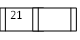

## Step 2: Insert 34
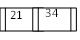

## Step 3: Insert 41
(Height of the tree increase)

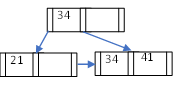

## Step 4: Insert 51
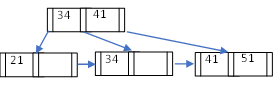

## Step 5: Insert 53
(Height of the tree increase)

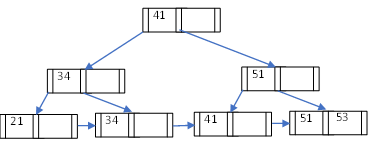


## Step 6,7,8: Insert 77, 83, 85
(Height of the tree NOT change)

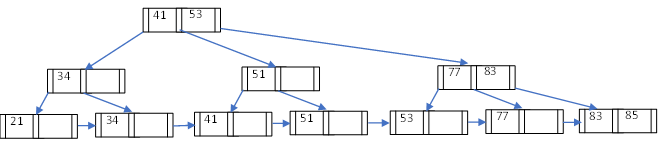

## Step 9: Insert 86
(Height of the tree increase)

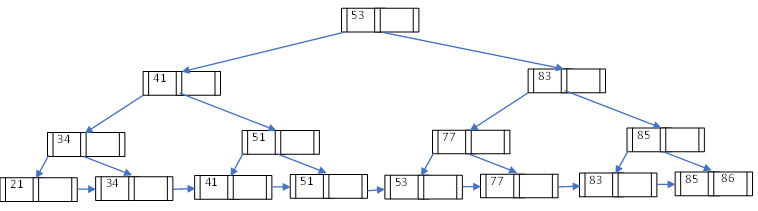

# Q2.3 Insert the search-key values 84, 19 and 32 in sequence to the given B+-tree, and draw a new diagram for each insertion.

## Insert 84
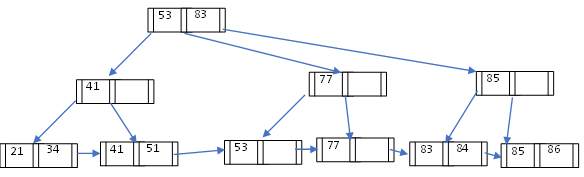

## Insert 19

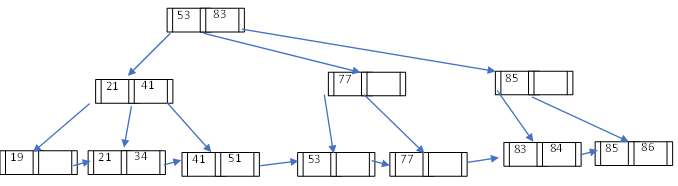


## Insert 32

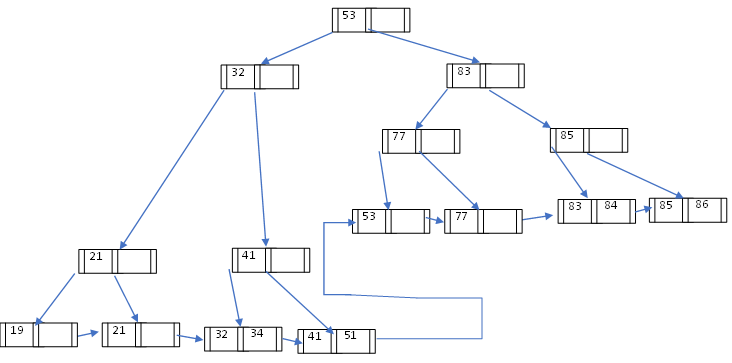

## Q2.4 Suggest a sequence of search-key values to be deleted from the resultant B+-tree in Q4.2 to shrink the tree to 2 levels with the least number of deletions. Show the steps by drawing a new diagram whenever a node is deleted.

### Ans:
To shrink the tree to 2 levels, delete 5 elements are required. Delete element as follow {21, 34, 41, 51, 53}

### Delete 21
node “21” removed; it’s parent “34” also removed; tree shrank to 3 levels

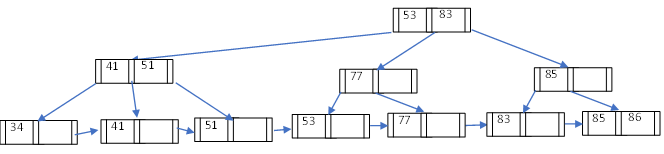


### Delete 34
node “34” removed;

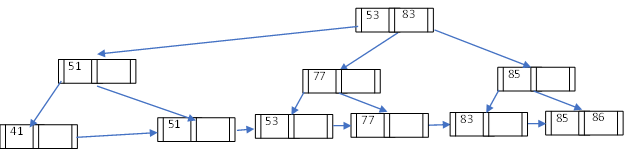

### Delete 41
node “41” removed;

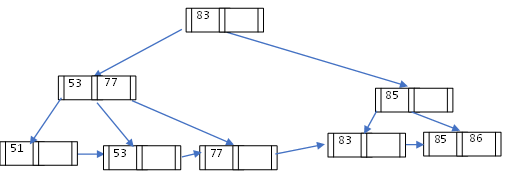

### Delete 51:
node “51” removed

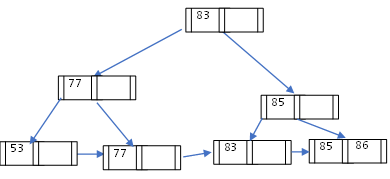

### Delete 53
node “53” removed; node “77” removed; tree shrank to 2 levels

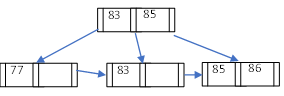


# Question 3 - Data Querying

## Q3.1 Write a query to print the hacker_id, name, and the number of distinct tasks each hacker participated in. Sort the result by the number of tasks in descending order, and then by hacker_id in ascending order if there’s a tie.

### Ans:

In [ ]:
SELECT
    Hackers.hacker_id, Hackers.name,
    COUNT(DISTINCT task_id) AS task_count
FROM Hackers
JOIN Submissions
ON Hackers.hacker_id = Submissions.hacker_id
GROUP BY
    Hackers.hacker_id, Hackers.name
ORDER BY
    task_count DESC, Hackers.hacker_id ASC;


## Q3.2 Write a query to find the task_id, description, and the total bonus awarded for each task. Sort the result by task_id in ascending order.

### Ans:

In [ ]:
;WITH CountSubmissions AS (
  SELECT task_id, count(1) count_submission
  FROM
  (
    SELECT
        distinct task_id, hacker_id
    FROM
        Submissions
  ) UniqueSubmissions
  GROUP BY task_id
)
SELECT Tasks.task_id, Tasks.description,
  Tasks.bonus *
    (case
      when CountSubmissions.count_submission > 3
      then 3
      else ISNULL(CountSubmissions.count_submission,0) end
      ) total_bonus_awarded FROM Tasks
FROM Tasks
LEFT JOIN CountSubmissions
ON Tasks.task_id = CountSubmissions.task_id
ORDER BY task_id


## Q3.3 Write a query to list the submission_id, hacker_id, name, and score of the highest-scoring submission for each task submitted on 2023-01-01. If multiple submissions have the highest score for the same task, return the submission with the smallest submission_id. Sort the result by task_id in ascending order.

### Ans:

In [ ]:
;WITH CTE_MAX_SCORE_SUBMISSION AS (
  SELECT hacker_id, task_id, MAX(score) max_score, MIN(submission_id) first_submission_id
  FROM Submissions
  WHERE submission_date ='2023-01-01'
  GROUP BY hacker_id, task_id
)
SELECT task_id, first_submission_id as submission_id, CTE_MAX_SCORE_SUBMISSION.hacker_id, name, max_score as highest_score
FROM CTE_MAX_SCORE_SUBMISSION
JOIN Hackers
ON CTE_MAX_SCORE_SUBMISSION.hacker_id = Hackers.hacker_id
ORDER BY task_id


## Q3.4 Write a query to print the hacker_id, name, and the total score each hacker achieved across all tasks. For each task, only the hacker's best score counts. Sort the result by total_score in descending order and by hacker_id in ascending order if there's a tie.

### Ans

In [ ]:
;WITH CTE_MAX_SCORE_SUBMISSION AS (
  SELECT hacker_id, task_id, MAX(score) max_score
  FROM Submissions
  GROUP BY hacker_id, task_id
),
  CTE_MAX_SCORE_WITH_FIRST_SUBMISSION AS (
  SELECT Submissions.hacker_id, Submissions.task_id, Submissions.score max_score, MIN(submission_id) first_submission_id
  FROM Submissions
  JOIN CTE_MAX_SCORE_SUBMISSION
  ON Submissions.hacker_id = CTE_MAX_SCORE_SUBMISSION.hacker_id
  AND Submissions.task_id = CTE_MAX_SCORE_SUBMISSION.task_id
  AND Submissions.score = CTE_MAX_SCORE_SUBMISSION.max_score
  GROUP BY Submissions.hacker_id, Submissions.task_id, Submissions.score
),
  CTE_RANKED_SUBMISSION AS (
  SELECT hacker_id, task_id, max_score, first_submission_id,
  RANK() OVER (PARTITION BY task_id ORDER BY max_score DESC, first_submission_id ASC) AS ranking
  FROM CTE_MAX_SCORE_WITH_FIRST_SUBMISSION
)
SELECT CRS.task_id, CRS.first_submission_id as submission_id, CRS.hacker_id, name,
      CASE
        WHEN CRS.ranking <= 3 THEN (max_score + bonus)
        ELSE max_score
      END
      as total_score
FROM CTE_RANKED_SUBMISSION CRS
JOIN Hackers
ON CRS.hacker_id = Hackers.hacker_id
JOIN Tasks
ON CRS.task_id = Tasks.task_id
ORDER BY total_score desc, hacker_id asc


## 3.5 Write a query to find the hacker_id, name, and bank_account of hackers who did not participate in any tasks.

### Ans:

In [ ]:
SELECT Hackers.hacker_id, name, bank_account FROM Hackers
LEFT JOIN Submissions
ON Hackers.hacker_id = Submissions.hacker_id
WHERE Submissions.hacker_id IS NULL

# Question 4 - Recommender System

## Q4.1 Please write two basic approaches for recommender system and briefly explain them.

### Ans
Two basic approaches are:

1.   Collaborative filtering method
2.   Content-based filtering

***Collaborative filtering method***

It finds a subset of user who have similar tastes and preferences to the target user and use this subset for offering recommendations. In order to identify, we can use item based / user based collaborative filtering to find the similar items/users and recommend similar items.

1.   User-based collaborative filtering:

  It will make user-to-user correlations, and find out the highly correlated user, and recommend items preferred by those users.
  Consider two users, A and B: if the most of the item that User A and B interested in are overlapped (e.g.: over 90%, this value can be adjusted depend on how the system define user are similar), then, recommender system will treat user A and B are similar user, and, system could suggest to non-overlapped items (e.g.: the remaining 10%) to from A to B (or B to A)
2.   Item-based collaborative filtering:
  
  It will make item-to-item correlations, and find out the highly correlated items, and recommend user with similar items.
  Consider there is 2 items (A and B), and most of the user like these 2 items at the same times. Then, item A and item B are similar items. If a User U interest in item A, as item A and B are similar, the recommend system will suggest item B to User U.


***Content-based filtering***:

Content-based filtering recommends items based on the characteristics of the items and the user's past preferences. It looks at the properties of an item and recommends items with similar properties.
System assigns the characteristics to each item (e.g.: classical music). Based on user past preferences, system can identify which characteristics that user is interested in (e.g.: classical music), then, recommender system could system the item in which characteristics is “classical music” to the user.

## Q4.2 One common challenge in recommender systems is the filter bubble problem. Explain what the filter bubble problem is and how it affects user experience. Suggest at least two strategies to mitigate the filter bubble issue.

### Ans:


A filler bubble as a result state in which a recommender system selectively recommend what information the user would like to see based on the information about the user (such as location, past click behavior, search history). As a result, user become separated from information that disagrees with their viewpoint effectively, isolating them in their own cultural or ideological bubble’s. E.g.: base on the past interaction, user interest in sport news, then, the system will recommend sport new rather than exposing user to different news or interests.

Because of the above, filter bubble will affect user experience as follow:


*   ***narrow user perspectives***:

    User may only see the content
that that aligns with their current views, leading to a limited understanding of different perspectives or new topics
*   ***build up a confirmation bias***
    
    It may build up a confirmation bias to user: As user continually exposed to the information that support their existing beliefs, user may develop a skewed perception of reality.


To mitigate the filter bubble issue:


1. ***User control and transparency:***
  
  Allow user to control their recommendation settings, being transparent about how the recommendations are generated by the recommender system. E.g.: User can customize their preferences (rather than suggested by the system just based on user’s past interaction), and see why certain items are being recommended, thus, user have a certain degree to tuning the system recommendation.
2. ***Encouraging User feedback***

  Allow user provide feedback on the recommendation. It can help to improve the diversity and relevance of suggestions. Just like Facebook, Facebook will provide different content to user, and ask whether user want to show more information related to the suggested topic. Thus, user can indicate if they want more variety or if they appreciate being show new type of content



## Q4.3 Rating prediction is an important task for a recommender system. Try to implement a recommendation model using the Goodbooks-10k dataset to predict user ratings

## Ans


1.   ***use subset due to computational constraints***
2.   ***using user-based collaborative filtering model***

i.e.: Limit the dataset to the top 5,000 users and top 3,000 books based on the number of interactions (ratings)

In [1]:
#Download dataset if necessary
# Step 1: Download the dataset from Kaggle and load it
!pip install kaggle
!kaggle datasets download -d zygmunt/goodbooks-10k
!unzip goodbooks-10k.zip


Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
  0% 0.00/11.6M [00:00<?, ?B/s]
100% 11.6M/11.6M [00:00<00:00, 127MB/s]
Archive:  goodbooks-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset into a pandas dataframe
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

#because the source contain duplicate record
# Step 2: Remove duplicate records from the books dataset
books.drop_duplicates(inplace=True)

# Step 3: Remove duplicate records from the ratings dataset
ratings.drop_duplicates(inplace=True)

# Limit the dataset to the top 5,000 users and top 3,000 books based on the number of interactions (ratings)
# Step 4: Filter Top Users and Books
top_users = ratings['user_id'].value_counts().head(5000).index
top_books = ratings['book_id'].value_counts().head(3000).index
filtered_ratings = ratings[ratings['user_id'].isin(top_users) & ratings['book_id'].isin(top_books)]

# Step 5: Remove duplicate records from filtered ratings (if exist)
filtered_ratings.drop_duplicates(subset=['user_id', 'book_id'], inplace=True)

# Step 6: Split the data into training and test sets
# set test_size = 0.15 -> 85% data use for training, and 15% data use for testing
# fix the random_state to ensure every execute obtain same result
train_data, test_data = train_test_split(filtered_ratings, test_size=0.15, random_state=42)

# Step 7: Implement User-based Collaborative Filtering
#input train_data and test_data
def user_based_collaborative_filtering(train_data, test_data):
    # Create the user-item matrix for training
    # fill na to 0 (if exist)
    user_item_matrix_train = train_data.pivot(index='user_id', columns='book_id', values='rating').fillna(0)
    user_item_matrix_train = csr_matrix(user_item_matrix_train.values)

    # Calculate user similarity
    # use cosine similarity to calculate
    similarity = cosine_similarity(user_item_matrix_train)

    # Predict ratings
    # Predict the rating of the user at testing data
    pred_ratings = []
    for _, row in test_data.iterrows():
        user = row['user_id']
        item = row['book_id']
        user_idx = train_data['user_id'].value_counts().index.get_loc(user)
        item_idx = train_data['book_id'].value_counts().index.get_loc(item)

        sim_scores = similarity[user_idx]
        user_ratings = user_item_matrix_train[:, item_idx].toarray().flatten()

        pred_rating = np.dot(sim_scores, user_ratings) / np.sum(sim_scores)
        pred_ratings.append(pred_rating)

    return pred_ratings

# User-based Collaborative Filtering
user_cf_pred = user_based_collaborative_filtering(train_data, test_data)

# Step 8: Evaluate the Model
#create a function to calculate {Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)}
def evaluate_model(true_ratings, pred_ratings):
    mae_score = mean_absolute_error(true_ratings, pred_ratings)
    rmse_score = root_mean_squared_error(true_ratings, pred_ratings)
    return mae_score, rmse_score

#store the rating of the testing user
test_ratings = test_data['rating'].values

# Evaluation
#calcuate {Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)} of the testing data
user_cf_mae, user_cf_rmse = evaluate_model(test_ratings, user_cf_pred)
#display the result
print("User-based collaborative filtering - Mean Absolute Error(MAE):", user_cf_mae)
print("User-based collaborative filtering - Root Mean Squared Error(RMSE):", user_cf_rmse)


<ipython-input-2-2fcbaf5d2236>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ratings.drop_duplicates(subset=['user_id', 'book_id'], inplace=True)


User-based collaborative filtering - Mean Absolute Error(MAE): 3.834926060082898
User-based collaborative filtering - Root Mean Squared Error(RMSE): 3.9548170839887264
